In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
# inline plotting
%matplotlib inline

In [43]:
from labproject.experiments import Experiment, ScaleDim, ScaleSampleSize
from labproject.utils import get_log_path

In [44]:
from labproject.data import DATASETS, DISTRIBUTIONS
from labproject.metrics import METRICS
from torch.distributions import MultivariateNormal


In [45]:
METRICS.keys()

dict_keys(['mmd_rbf', 'mmd_polynomial', 'mmd_linear_naive', 'mmd_linear', 'c2st_nn', 'c2st_rf', 'c2st_knn', 'gaussian_kl_divergence', 'wasserstein_gauss_squared', 'sliced_wasserstein', 'wasserstein_sinkhorn'])

In [6]:
col_inter = {
    "SW" : "C0",
    "MMD": "C1",
    "KL": "C2",
    "C2ST": "C3",
    "FID": "C4",
}

col_intra = {
    "SW": "midnightblue",
    "MMD": "brown",
    "KL": "olive",
    "C2ST": "maroon",
    "FID": "purple",
}





color_dict = {"wasserstein": "#cc241d", "mmd": "#eebd35", "c2st": "#458588", "fid": "#8ec07c", "kl": "#d3869b"}

generate_palette(color_dict["wasserstein"])_

col_dict= {0: col_inter, 1: col_intra}
# make a mapping from the experiment name to the color
mapping = {'ScaleSampleSizeKL':'KL', 'ScaleSampleSizeSW':'SW',
           'ScaleSampleSizeMMD':'MMD', 'ScaleSampleSizeC2ST':'C2ST',
           'ScaleSampleSizeFID':'FID', }

In [46]:
from labproject.plotting import generate_palette
color_dict = {"wasserstein": "#cc241d",
              "mmd": "#eebd35",
              "c2st": "#458588",
              "fid": "#8ec07c", 
              "kl": "#8ec07c"}


col_map = {'ScaleSampleSizeKL':'kl', 'ScaleSampleSizeSW':'wasserstein',
           'ScaleSampleSizeMMD':'mmd', 'ScaleSampleSizeC2ST':'c2st',
           'ScaleSampleSizeFID':'fid', }

generate_palette(color_dict[col_map[exp_name]])

generate_palette(color_dict["fid"])

generate_palette(color_dict[col_map[exp_name]])



[(0.9518248761721931, 0.94241942961992, 0.9291870203489796),
 (0.9471838614989107, 0.8919113928433403, 0.7481438496900739),
 (0.9425428468256283, 0.8414033560667606, 0.5671006790311681),
 (0.9379018321523458, 0.790895319290181, 0.3860575083722624),
 (0.9333333333333333, 0.7411764705882353, 0.20784313725490197)]

In [54]:
col_dark = {}
col_light = {}

for e, exp_name in enumerate(cfg.experiments):
    col_dark[exp_name] = generate_palette(color_dict[col_map[exp_name]], saturation='dark')[2]
    col_light[exp_name] = generate_palette(color_dict[col_map[exp_name]], saturation='light')[-1]
color_list = [col_light, col_dark]

In [ ]:
for exp_name in col_map.keys():
    for col_idx in range(5):

generate_palette(color_dict[col_map[exp_name]])[col_idx]

Running experiments...
Seed: 0
Experiments: ['ScaleSampleSizeSW', 'ScaleSampleSizeC2ST', 'ScaleSampleSizeMMD', 'ScaleSampleSizeFID']
Data: toy_2d
Experiment ScaleSampleSizeSW finished in 0.058728694915771484
Numerical results saved to results/samplesize/samplesize_2024-02-06_18-38-53.pkl
Experiment ScaleSampleSizeSW finished in 0.11458778381347656
Numerical results saved to results/samplesize/samplesize_2024-02-06_18-38-53.pkl
Experiment ScaleSampleSizeC2ST finished in 34.09403157234192
Numerical results saved to results/samplesize/samplesize_2024-02-06_18-39-27.pkl
Experiment ScaleSampleSizeC2ST finished in 75.67280340194702
Numerical results saved to results/samplesize/samplesize_2024-02-06_18-40-09.pkl
Experiment ScaleSampleSizeMMD finished in 0.6983625888824463
Numerical results saved to results/samplesize/samplesize_2024-02-06_18-40-10.pkl
Experiment ScaleSampleSizeMMD finished in 1.2378160953521729
Numerical results saved to results/samplesize/samplesize_2024-02-06_18-40-10.pkl
E

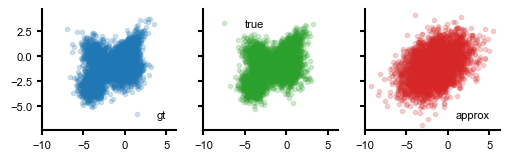

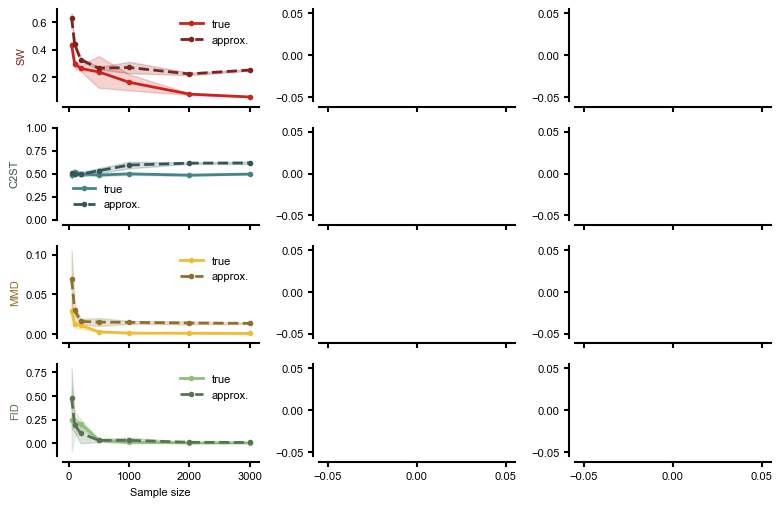

In [56]:
from labproject.data import DATASETS, DISTRIBUTIONS
from labproject.utils import get_cfg, set_seed, get_log_path
from labproject.data import get_dataset
import os
from omegaconf import OmegaConf
from labproject.experiments import *
from labproject.plotting import cm2inch
import time
import datetime
import pickle
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal


print("Running experiments...")
# load the config file
cfg = OmegaConf.load("configs/conf_samplesize.yaml") 
cfg.running_user = 'samplesize'
seed = cfg.seed

set_seed(seed)
print(f"Seed: {seed}")
print(f"Experiments: {cfg.experiments}") 
print(f"Data: {cfg.data}")

dataset_fn = get_dataset(cfg.data)
n_samples = cfg.n



dataset_gt = dataset_fn(n_samples,2)
dataset_intra = dataset_fn(n_samples,2)
dataset_inter = MultivariateNormal(torch.mean(dataset_gt, axis=0).T,
                                   torch.cov(dataset_gt.T)).sample((n_samples,))

fig, axes = plt.subplots(1, 3, figsize=cm2inch((15, 4)), sharex=True, sharey=True)
axes[0].plot(dataset_gt[:, 0], dataset_gt[:, 1], 'o', label='gt', alpha=0.2, color='C0')
axes[1].plot(dataset_intra[:, 0], dataset_intra[:, 1], 'o', label='true',  alpha=0.2, color='C2')
axes[2].plot(dataset_inter[:, 0], dataset_inter[:, 1], 'o', label='approx' ,alpha=0.2, color='C3')
for ax in axes:
    ax.legend()

# make comparison plots
fig, axes = plt.subplots(4, 3, figsize=cm2inch((20, 13)), sharex='col')
for ax in axes.flatten():
    # move spines outward
    ax.spines['bottom'].set_position(('outward', 4))
    ax.spines['left'].set_position(('outward', 4))
    ax.locator_params(nbins=3)

sample_sizes=[50, 100, 200, 500, 1000, 2000, 3000]

for e, exp_name in enumerate(cfg.experiments):
    experiment = globals()[exp_name]()
    time_start = time.time()
    dataset1 = dataset_gt
    ax = axes[e,0]
    for dc, data_comp in enumerate([dataset_intra, dataset_inter]):
        dataset2 = data_comp

        output = experiment.run_experiment(dataset1=dataset1,
                                           dataset2=dataset2,
                                           sample_sizes=sample_sizes,
                                           nb_runs = 3)#cfg.run)#np.insert(np.logspace(1, 3, 10, dtype=int), 0, 3))
        time_end = time.time()
        print(f"Experiment {exp_name} finished in {time_end - time_start}")

        log_path = get_log_path(cfg)
        os.makedirs(os.path.dirname(log_path), exist_ok=True)
        experiment.log_results(output, log_path)
        print(f"Numerical results saved to {log_path}")

        experiment.plot_experiment(*output, cfg.data,
                                   ax=ax,
                                   color=color_list[dc][exp_name], #generate_palette(color_dict[col_map[exp_name]])[col_idx], #col_dict[dc][mapping[exp_name]], 
                                   label='true' if dc == 0 else 'approx.',
                                   linestyle='-' if dc == 0 else '--',lw=2, marker='o')
        ax.set_ylabel(mapping[exp_name])
        ax.set_xlabel('')
        if mapping[exp_name]  == 'C2ST':
            ax.set_ylim([0,1])
        
    ax.legend()
    
axes[-1,0].set_xlabel('Sample size')
plt.tight_layout()
print(f"Plots saved to {cfg.data}.png")
plt.savefig(f"plots/{cfg.data}.png", dpi=300)
print("Finished running experiments.")


# All multiple datasets

In [89]:
from labproject.data import DATASETS, DISTRIBUTIONS
from labproject.utils import get_cfg, set_seed, get_log_path
from labproject.data import get_dataset
import os
from omegaconf import OmegaConf
from labproject.experiments import *
from labproject.plotting import cm2inch
import time
import datetime
import pickle
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal


print("Running experiments...")
# load the config file
cfg = OmegaConf.load("configs/conf_all_samplesize.yaml") 
cfg.running_user = 'samplesize'
seed = cfg.seed

set_seed(seed)
print(f"Seed: {seed}")
print(f"Experiments: {cfg.experiments}") 
print(f"Data: {cfg.data}")

# assert cfg.data is list
assert len(cfg.data) == len(cfg.n) == len(cfg.d), "Data, n and d must be lists of the same length"
    
# make comparison plots
fig, axes = plt.subplots(4, 3, figsize=cm2inch((20, 13)), sharex='col')
for ax in axes.flatten():
    # move spines outward
    ax.spines['bottom'].set_position(('outward', 4))
    ax.spines['left'].set_position(('outward', 4))
    ax.locator_params(nbins=3)

sample_sizes=[50, 100, 200, 500, 1000, 2000, 3000]
sample_sizes=[50, 100, 200,3000]


for dd, ds in enumerate(cfg.data):
    dataset_fn = get_dataset(cfg.data[dd])
    n_samples = cfg.n[dd]
    
    dataset_gt = dataset_fn(n_samples,cfg.d[dd])
    dataset_intra = dataset_fn(n_samples,cfg.d[dd])
    
    print(cfg.data[dd], n_samples, cfg.d[dd])
    
    if cfg.data[dd] == 'toy_2d':
        dataset_inter = MultivariateNormal(torch.mean(dataset_gt, axis=0).T,
                                           torch.cov(dataset_gt.T)).sample((n_samples,))
    elif cfg.data[dd] == 'random' and cfg.augmentation[dd]=='mean_shift':
        dataset_inter = dataset_gt + 1
    elif cfg.data[dd] == 'random' and cfg.augmentation[dd]=='one_dim_shift':
        # just shift the first dimension by 0.1
        dataset_inter = dataset_gt.clone()
        dataset_inter[:,0] += 1

        
    fig_data, axes_data = plt.subplots(1, 3, figsize=cm2inch((15, 4)), sharex=True, sharey=True)
    axes_data[0].plot(dataset_gt[:1000, 0], dataset_gt[:1000, 1], 'o', label='gt', alpha=0.2, color='C0')
    axes_data[1].plot(dataset_intra[:1000, 0], dataset_intra[:1000, 1], 'o', label='true',  alpha=0.2, color='C2')
    axes_data[2].plot(dataset_inter[:1000, 0], dataset_inter[:1000, 1], 'o', label='approx' ,alpha=0.2, color='C3')
    for ax in axes_data:
        ax.legend()

        
    
    for e, exp_name in enumerate(cfg.experiments):
        experiment = globals()[exp_name]()
        time_start = time.time()
        dataset1 = dataset_gt
        ax = axes[e,dd]
        for dc, data_comp in enumerate([dataset_intra, dataset_inter]):
            dataset2 = data_comp

            output = experiment.run_experiment(dataset1=dataset1,
                                            dataset2=dataset2,
                                            sample_sizes=sample_sizes,
                                            nb_runs = 5)#cfg.run)#np.insert(np.logspace(1, 3, 10, dtype=int), 0, 3))
            time_end = time.time()
            print(f"Experiment {exp_name} finished in {time_end - time_start}")

            log_path = get_log_path(cfg)
            os.makedirs(os.path.dirname(log_path), exist_ok=True)
            experiment.log_results(output, log_path)
            print(f"Numerical results saved to {log_path}")

            experiment.plot_experiment(*output, cfg.data[dd],
                                    ax=ax,
                                    color=color_list[dc][exp_name], #generate_palette(color_dict[col_map[exp_name]])[col_idx], #col_dict[dc][mapping[exp_name]], 
                                    label='true' if dc == 0 else 'approx.',
                                    linestyle='-' if dc == 0 else '--',lw=2, marker='o')
            ax.set_ylabel(mapping[exp_name])
            ax.set_xlabel('')
            if mapping[exp_name]  == 'C2ST':
                ax.set_ylim([0,1])
            
        ax.legend()
    
axes[-1,0].set_xlabel('Sample size')
plt.tight_layout()
print(f"Plots saved to {cfg.data}.png")
fig.savefig(f"plots/{cfg.data}.png", dpi=300)
fig.savefig(f"plots/{cfg.data}.pdf", dpi=300)

print("Finished running experiments.")

    # dataset_inter = MultivariateNormal(torch.mean(dataset_gt, axis=0).T,
    #                                 torch.cov(dataset_gt.T)).sample((n_samples,))
        


Running experiments...
Seed: 0
Experiments: ['ScaleSampleSizeSW', 'ScaleSampleSizeC2ST', 'ScaleSampleSizeMMD', 'ScaleSampleSizeFID']
Data: ['toy_2d', 'random', 'random']
toy_2d 10000 2
Experiment ScaleSampleSizeSW finished in 0.028711795806884766
Numerical results saved to results/samplesize/all_samplesize_2024-02-06_20-05-09.pkl
Experiment ScaleSampleSizeSW finished in 0.05797314643859863
Numerical results saved to results/samplesize/all_samplesize_2024-02-06_20-05-09.pkl
Experiment ScaleSampleSizeC2ST finished in 15.631774187088013
Numerical results saved to results/samplesize/all_samplesize_2024-02-06_20-05-24.pkl
Experiment ScaleSampleSizeC2ST finished in 42.839905738830566
Numerical results saved to results/samplesize/all_samplesize_2024-02-06_20-05-51.pkl
Experiment ScaleSampleSizeMMD finished in 0.5321903228759766
Numerical results saved to results/samplesize/all_samplesize_2024-02-06_20-05-52.pkl
Experiment ScaleSampleSizeMMD finished in 1.0005791187286377
Numerical results sav

In [ ]:
from labproject.data import DATASETS, DISTRIBUTIONS
from labproject.utils import get_cfg, set_seed, get_log_path
from labproject.data import get_dataset
import os
from omegaconf import OmegaConf
from labproject.experiments import *
from labproject.plotting import cm2inch
import time
import datetime
import pickle
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal


print("Running experiments...")
# load the config file
cfg = OmegaConf.load("configs/conf_samplesize.yaml") 
cfg.running_user = 'samplesize'
seed = cfg.seed

set_seed(seed)
print(f"Seed: {seed}")
print(f"Experiments: {cfg.experiments}") 
print(f"Data: {cfg.data}")



dataset_fn = get_dataset(cfg.data)
n_samples = cfg.n



dataset_gt = dataset_fn(n_samples,2)
dataset_intra = dataset_fn(n_samples,2)
dataset_inter = MultivariateNormal(torch.mean(dataset_gt, axis=0).T,
                                   torch.cov(dataset_gt.T)).sample((n_samples,))

fig, axes = plt.subplots(1, 3, figsize=cm2inch((15, 4)), sharex=True, sharey=True)
axes[0].plot(dataset_gt[:, 0], dataset_gt[:, 1], 'o', label='gt', alpha=0.2, color='C0')
axes[1].plot(dataset_intra[:, 0], dataset_intra[:, 1], 'o', label='true',  alpha=0.2, color='C2')
axes[2].plot(dataset_inter[:, 0], dataset_inter[:, 1], 'o', label='approx' ,alpha=0.2, color='C3')
for ax in axes:
    ax.legend()

# make comparison plots
fig, axes = plt.subplots(4, 3, figsize=cm2inch((20, 13)), sharex='col')
for ax in axes.flatten():
    # move spines outward
    ax.spines['bottom'].set_position(('outward', 4))
    ax.spines['left'].set_position(('outward', 4))
    ax.locator_params(nbins=3)

sample_sizes=[50, 100, 200, 500, 1000, 2000, 3000]

for e, exp_name in enumerate(cfg.experiments):
    experiment = globals()[exp_name]()
    time_start = time.time()
    dataset1 = dataset_gt
    ax = axes[e,0]
    for dc, data_comp in enumerate([dataset_intra, dataset_inter]):
        dataset2 = data_comp

        output = experiment.run_experiment(dataset1=dataset1,
                                           dataset2=dataset2,
                                           sample_sizes=sample_sizes,
                                           nb_runs = 3)#cfg.run)#np.insert(np.logspace(1, 3, 10, dtype=int), 0, 3))
        time_end = time.time()
        print(f"Experiment {exp_name} finished in {time_end - time_start}")

        log_path = get_log_path(cfg)
        os.makedirs(os.path.dirname(log_path), exist_ok=True)
        experiment.log_results(output, log_path)
        print(f"Numerical results saved to {log_path}")

        experiment.plot_experiment(*output, cfg.data,
                                   ax=ax,
                                   color=color_list[dc][exp_name], #generate_palette(color_dict[col_map[exp_name]])[col_idx], #col_dict[dc][mapping[exp_name]], 
                                   label='true' if dc == 0 else 'approx.',
                                   linestyle='-' if dc == 0 else '--',lw=2, marker='o')
        ax.set_ylabel(mapping[exp_name])
        ax.set_xlabel('')
        if mapping[exp_name]  == 'C2ST':
            ax.set_ylim([0,1])
        
    ax.legend()
    
axes[-1,0].set_xlabel('Sample size')
plt.tight_layout()
print(f"Plots saved to {cfg.data}.png")
plt.savefig(f"plots/{cfg.data}.png", dpi=300)
print("Finished running experiments.")
